In [85]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [86]:
%matplotlib inline

In [87]:
plt.rcParams['figure.figsize'] = (10, 5)

In [88]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [89]:
transmissionlines_data = pd.read_csv("ElectricityTransmissionLines_v2.csv")
print("done")

done


In [90]:
transmissionlines_data.head()

,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,CAPACITYKV,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,SHAPE_Length
0,1,Transmission Line,A network of wires and insulators used to conn...,Overhead,1,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.010167
1,2,Transmission Line,A network of wires and insulators used to conn...,Overhead,2,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.011240
2,3,Transmission Line,A network of wires and insulators used to conn...,Overhead,3,Calvale to Callide A Power Station,Operational,132,Queensland,5,20120710,NaN,0.009304
3,4,Transmission Line,A network of wires and insulators used to conn...,Overhead,4,Braemar to Bulli Creek,Operational,330,Queensland,5,20120710,NaN,0.830194
4,5,Transmission Line,A network of wires and insulators used to conn...,Overhead,5,Moura to Biloela Tee,Operational,132,Queensland,5,20120710,NaN,0.466893


In [91]:
transmissionlines_data.columns

Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
       'OPERATIONALSTATUS', 'CAPACITYKV', 'STATE', 'SPATIALCONFIDENCE',
       'REVISED', 'COMMENT', 'SHAPE_Length'],
      dtype='object')

In [92]:
row_1 = transmissionlines_data.iloc[1]
row_1

OBJECTID                                                             2
FEATURETYPE                                          Transmission Line
DESCRIPTION          A network of wires and insulators used to conn...
CLASS                                                         Overhead
FID                                                                  2
NAME                                Callide B Power Station to Calvale
OPERATIONALSTATUS                                          Operational
CAPACITYKV                                                         275
STATE                                                       Queensland
SPATIALCONFIDENCE                                                    5
REVISED                                                       20120710
COMMENT                                                            NaN
SHAPE_Length                                                   0.01124
Name: 1, dtype: object

In [93]:
row_1["DESCRIPTION"]

'A network of wires and insulators used to connect and transport high voltage electricity from generators to large demand customers and the lower voltage electricity distribution network'

In [94]:
transmissionlines_data["CAPACITYKV"]

0       275
1       275
2       132
3       330
4       132
       ... 
4745    132
4746    132
4747    132
4748    132
4749     66
Name: CAPACITYKV, Length: 4750, dtype: int64

<AxesSubplot:>

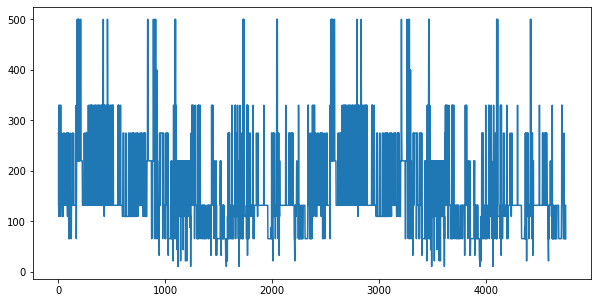

In [95]:
transmissionlines_data["CAPACITYKV"].plot()

<AxesSubplot:>

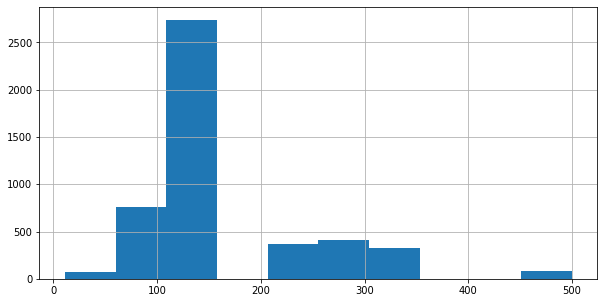

In [96]:
transmissionlines_data["CAPACITYKV"].hist()

<AxesSubplot:>

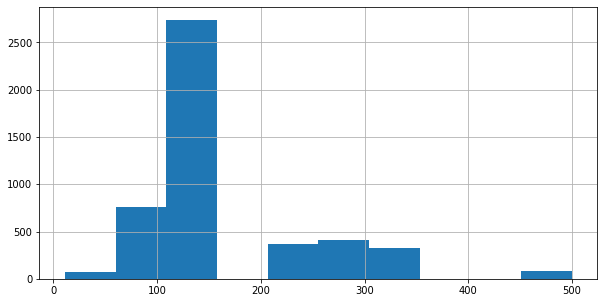

In [97]:
transmissionlines_data.CAPACITYKV[transmissionlines_data.CAPACITYKV < 600].hist()

In [98]:
transmissionlines_data["CAPACITYKV"].max()

500

STATE
Australian Capital Territory    132.000000
New South Wales                 157.471063
Northern Territory               71.238095
Queensland                      157.310855
South Australia                 160.875000
Tasmania                        138.478528
Victoria                        234.119403
Western Australia               133.400531
Name: CAPACITYKV, dtype: float64


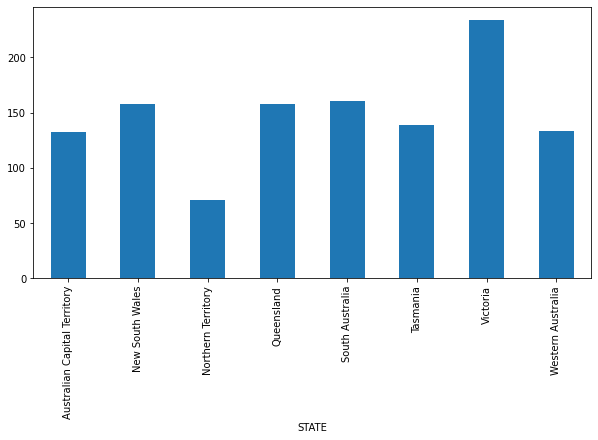

In [99]:
f1 = transmissionlines_data.groupby("STATE").CAPACITYKV.mean()
f1.plot(kind='bar')
print(f1)

In [100]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [101]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [102]:
transmissionlines_visual = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
transmissionlines_visual.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
transmissionlines_visual.sample(120)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,DESCRIPTON,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry
2074,Mundaring Weir to Sawyers Valley,None,1,1,None,Transmission Line,0.0663210137220078,Mundaring Weir to Sawyers Valley,1383,5,20120710,A network of wires and insulators used to conn...,66,Western Australia,Operational,1393,Overhead,"LINESTRING (116.200 -31.906, 116.200 -31.906, ..."
1404,Rookwood Rd to Potts Hill,None,1,1,None,Transmission Line,0.00791187916835896,Rookwood Rd to Potts Hill,2140,1,20160302,A network of wires and insulators used to conn...,132,New South Wales,Operational,2162,Underground,"LINESTRING (151.042 -33.888, 151.037 -33.894)"
1668,Algester-T161 to Rocklea-H16,None,1,1,None,Transmission Line,0.193347925274572,Algester-T161 to Rocklea-H16,601,5,20120710,A network of wires and insulators used to conn...,110,Queensland,Operational,604,Overhead,"LINESTRING (153.032 -27.599, 153.031 -27.599, ..."
1010,Gladstone Power Station to Gladstone-T5,None,1,1,None,Transmission Line,0.0025579167121207,Gladstone Power Station to Gladstone-T5,1593,3,20120710,A network of wires and insulators used to conn...,132,Queensland,Operational,1605,Overhead,"LINESTRING (151.219 -23.851, 151.218 -23.852, ..."
2135,Millstream to Tom Price,None,1,1,None,Transmission Line,2.08776316672137,Millstream to Tom Price,1516,3,20120710,A network of wires and insulators used to conn...,220,Western Australia,Operational,1528,Overhead,"LINESTRING (116.975 -21.244, 116.975 -21.244, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,Blackwall to Mount England,None,1,1,None,Transmission Line,0.223587818746234,Blackwall to Mount England,604,5,20120710,A network of wires and insulators used to conn...,275,Queensland,Operational,607,Overhead,"LINESTRING (152.786 -27.541, 152.785 -27.541, ..."
596,Torrens A Power Station to Torrens A Power Sta...,None,1,1,None,Transmission Line,0.00209354153195968,Torrens A Power Station to Torrens A Power Sta...,962,5,20120710,A network of wires and insulators used to conn...,275,South Australia,Operational,965,Overhead,"LINESTRING (138.521 -34.807, 138.522 -34.807, ..."
42,Lilyvale to Gregory,None,1,1,None,Transmission Line,0.0431610677410322,Lilyvale to Gregory,68,5,20120710,A network of wires and insulators used to conn...,132,Queensland,Operational,68,Overhead,"LINESTRING (148.392 -23.149, 148.392 -23.148, ..."
1360,Campbell to Rose Bay,None,1,1,None,Transmission Line,0.0590807485519333,Campbell to Rose Bay,2091,1,20160302,A network of wires and insulators used to conn...,132,New South Wales,Operational,2112,Underground,"LINESTRING (151.212 -33.880, 151.271 -33.878)"


In [103]:
cols_to_drop = ["DESCRIPTON", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
transmissionlines_visual.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
transmissionlines_visual.head(2)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry
0,Callide B Power Station to Calvale,None,1,1,None,Transmission Line,0.0101670994252775,Callide B Power Station to Calvale,1,5,20120710,275,Queensland,Operational,1,Overhead,"LINESTRING (150.620 -24.345, 150.620 -24.346, ..."
1,Callide B Power Station to Calvale,None,1,1,None,Transmission Line,0.0112400629710936,Callide B Power Station to Calvale,2,5,20120710,275,Queensland,Operational,2,Overhead,"LINESTRING (150.627 -24.343, 150.626 -24.343, ..."


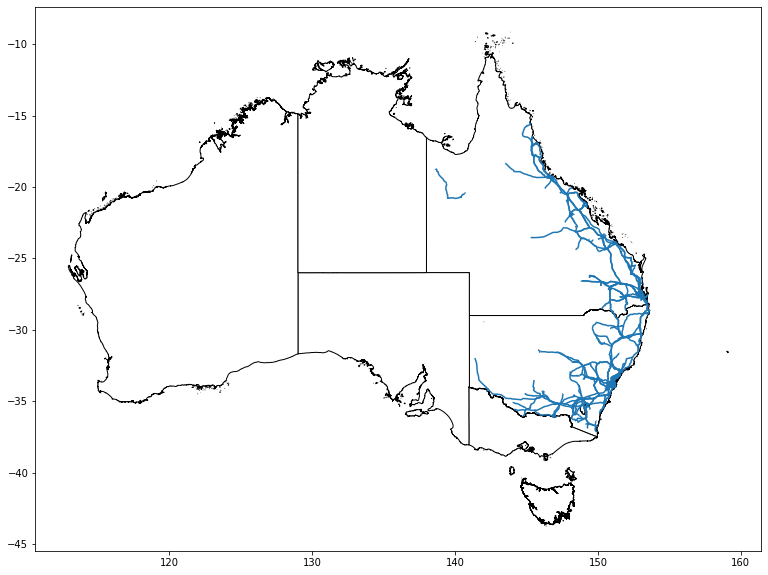

In [104]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
test1 = transmissionlines_visual["STATE"].astype(str) == "Queensland"
test2 = transmissionlines_visual["STATE"].astype(str) == "New South Wales"
transmissionlines_visual[test1].geometry.plot(ax=ax)
transmissionlines_visual[test2].geometry.plot(ax=ax)
a = transmissionlines_visual.iloc[0]

<AxesSubplot:>

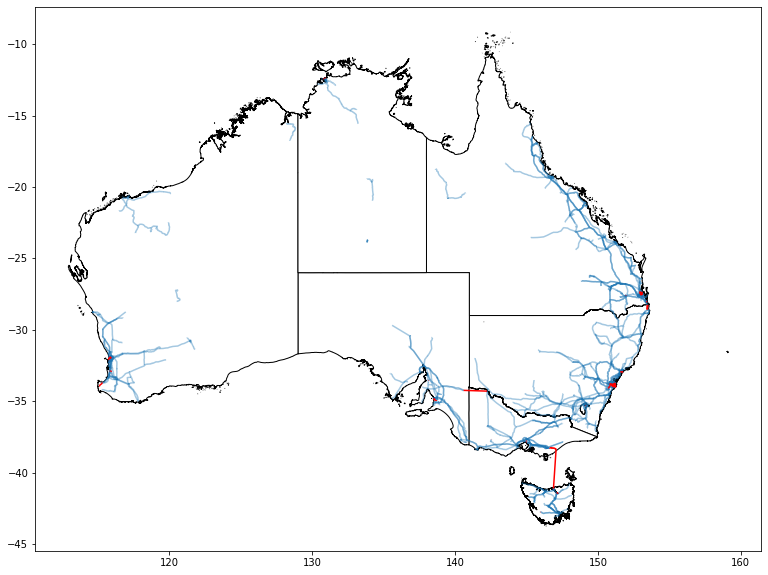

In [121]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
test1 = transmissionlines_visual["CLASS"].astype(str) == "Overhead"
test2 = transmissionlines_visual["CLASS"].astype(str) == "Underground"
transmissionlines_visual[test1].geometry.plot(ax=ax,alpha=0.4)
transmissionlines_visual[test2].geometry.plot(ax=ax,color='red')

Name                         Callide B Power Station to Calvale
descriptio                                                 None
tessellate                                                    1
visibility                                                    1
COMMENT                                                    None
FEATURETYP                                    Transmission Line
SHAPE_Leng                                   0.0101670994252775
NAME2                        Callide B Power Station to Calvale
OBJECTID                                                      1
SPATIALCON                                                    5
REVISED                                                20120710
CAPACITYKV                                                  275
STATE                                                Queensland
OPERATIONA                                          Operational
FID                                                           1
CLASS                                   

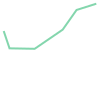

In [105]:
a = transmissionlines_visual.iloc[0]
print(a)
a.geometry

In [106]:
def add_centroid(row):
    return row.geometry.centroid

transmissionlines_visual["centroid"] = transmissionlines_visual.apply(add_centroid, axis=1)

transmissionlines_visual.sample(2)

c:\Users\Evan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid
468,Boat Creek to Boat Creek Tee,None,1,1,None,Transmission Line,0.000461645129466792,Boat Creek to Boat Creek Tee,766,5,20120710,132,Queensland,Operational,769,Overhead,"LINESTRING (151.165 -23.830, 151.165 -23.831)",POINT (151.16540 -23.83060)
2090,Alan Sherriff to Townsville Power Station,None,1,1,None,Transmission Line,0.307680201967918,Alan Sherriff to Townsville Power Station,1610,4,20130820,132,Queensland,Operational,1622,Overhead,"LINESTRING (146.748 -19.287, 146.747 -19.287, ...",POINT (146.63291 -19.26383)


POINT (150.62339098942996 -24.344950770484452)


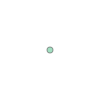

In [107]:
a = transmissionlines_visual.iloc[0]
print(a.centroid)
a.centroid

<AxesSubplot:>

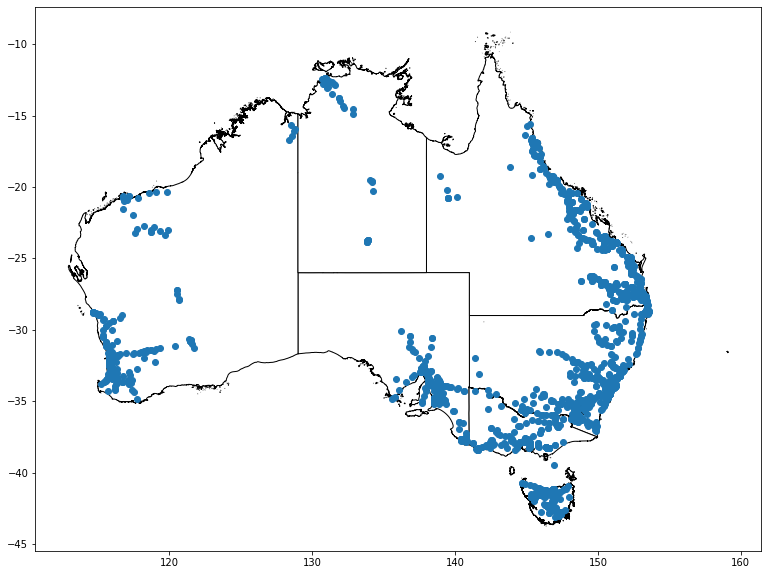

In [108]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
transmissionlines_visual.centroid.plot(ax=ax)

In [109]:
right_here = shapely.geometry.point.Point(147.0167, -32.16333)
transmissionlines_visual["distance_from_centre_NSW"] = transmissionlines_visual.centroid.distance(right_here)


Text(0.5, 1.0, 'Distribution of distances from center of NSW')

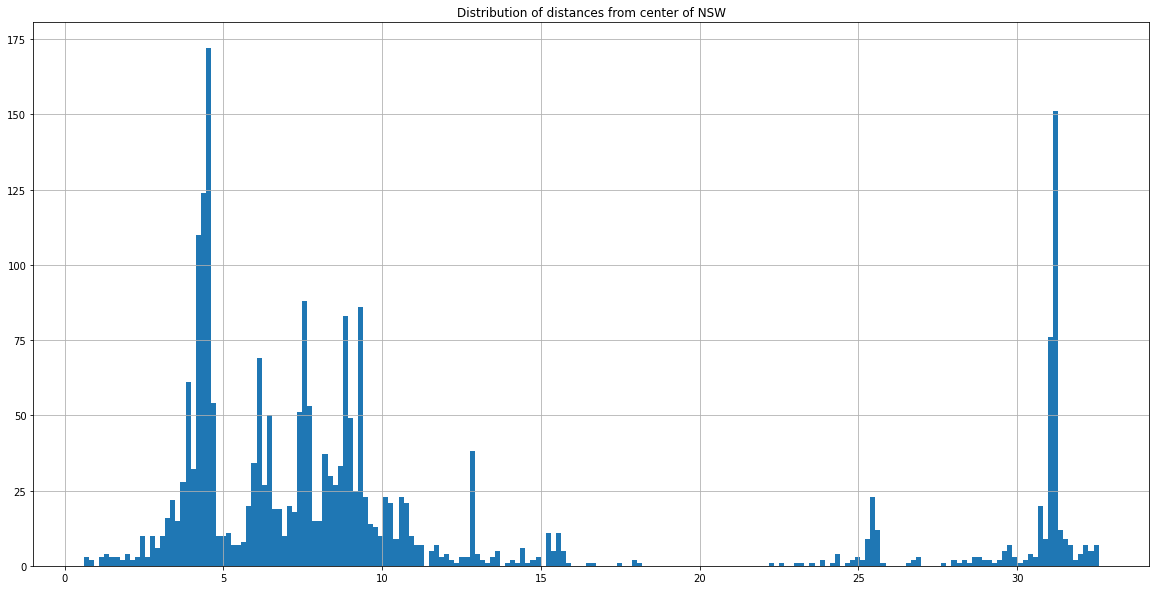

In [110]:
transmissionlines_visual.distance_from_centre_NSW.hist(bins=200)
plt.title("Distribution of distances from center of NSW")

<AxesSubplot:>

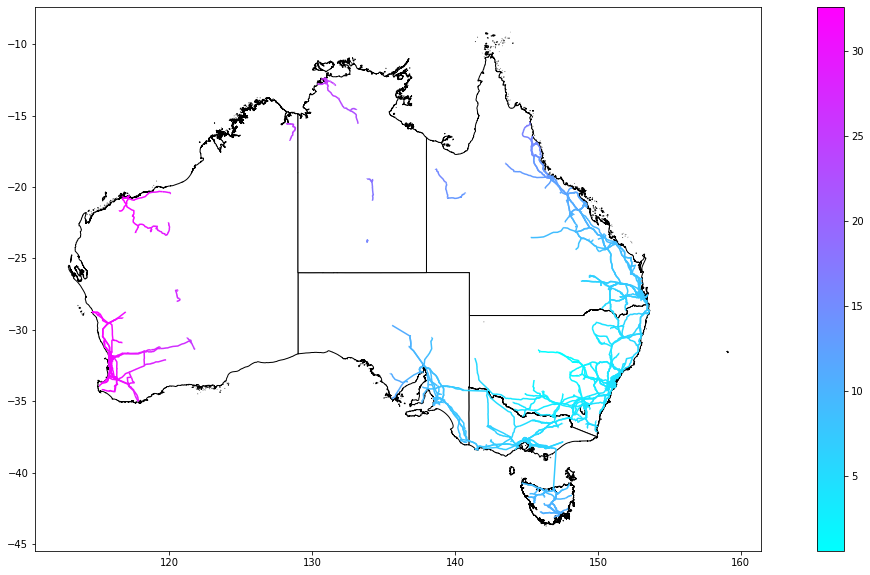

In [123]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
close_transmissionlines_visual = transmissionlines_visual[transmissionlines_visual.distance_from_centre_NSW < 50]
close_transmissionlines_visual.plot(ax=ax, column='distance_from_centre_NSW', cmap='cool',legend=True)

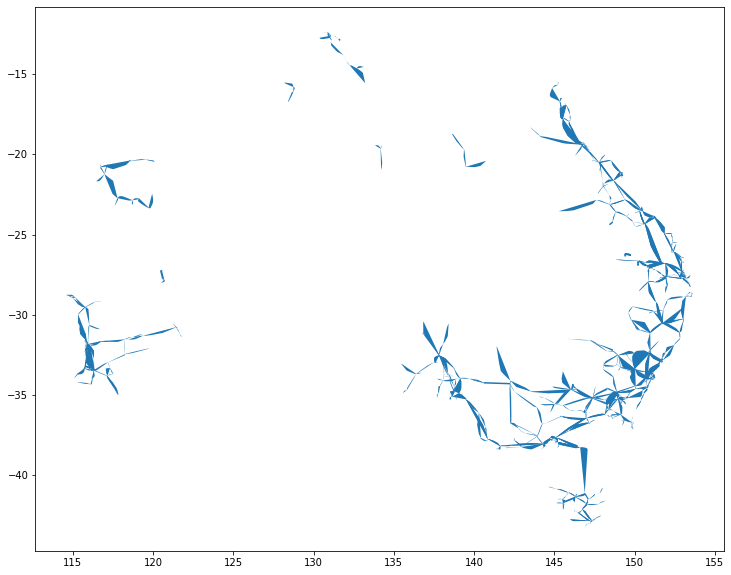

In [112]:
close_transmissionlines_visual.geometry.convex_hull.plot();

In [113]:
transmissionlines_visual.sample(2)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid,distance_from_centre_NSW
526,Thomastown Terminal to Brunswick Terminal,None,1,1,None,Transmission Line,0.09771502682382,Thomastown Terminal to Brunswick Terminal,853,5,20120710,220,Victoria,Operational,856,Overhead,"LINESTRING (145.010 -37.694, 145.009 -37.694, ...",POINT (144.98667 -37.73045),5.925697
2369,Ballarat North to Ballarat,None,1,1,None,Transmission Line,0.105841449003808,Ballarat North to Ballarat,2366,5,20130801,66,Victoria,Operational,1996,Overhead,"LINESTRING (143.847 -37.535, 143.849 -37.535, ...",POINT (143.88883 -37.54088),6.221061


In [114]:
transmissionlines_visual.groupby("STATE").distance_from_centre_NSW.max()

STATE
Australian Capital Territory     3.854092
New South Wales                  7.563291
Northern Territory              25.613057
Queensland                      16.690065
South Australia                 11.738602
Tasmania                        10.923243
Victoria                         8.319627
Western Australia               32.564821
Name: distance_from_centre_NSW, dtype: float64

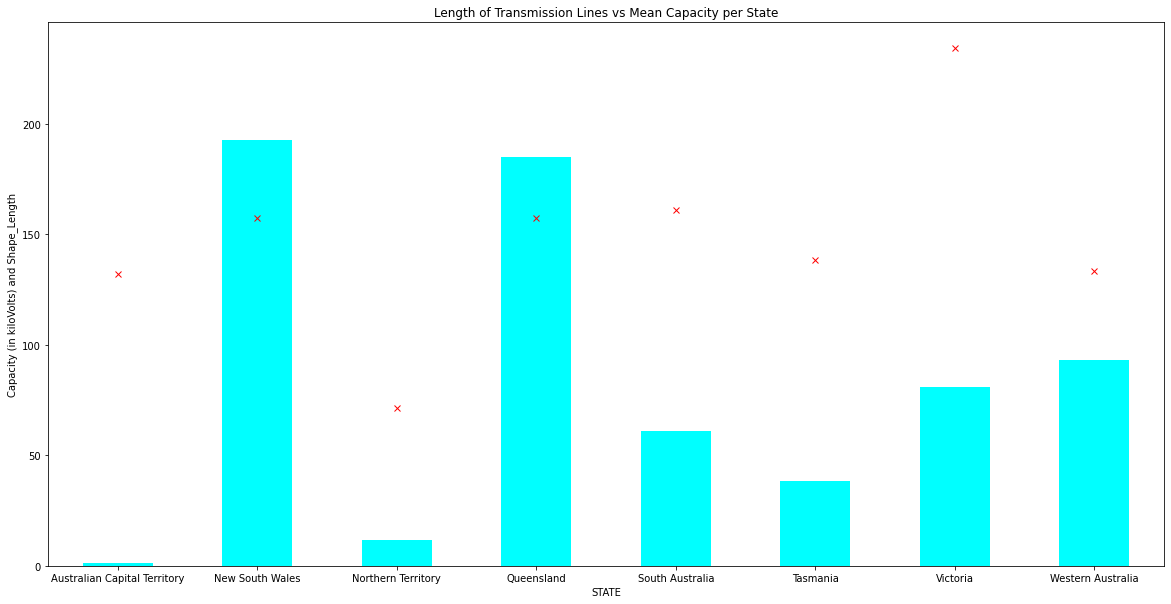

STATE
Australian Capital Territory    132.000000
New South Wales                 157.471063
Northern Territory               71.238095
Queensland                      157.310855
South Australia                 160.875000
Tasmania                        138.478528
Victoria                        234.119403
Western Australia               133.400531
Name: CAPACITYKV, dtype: float64


In [115]:
transmissionlines_visual["SHAPE_Leng"] = pd.to_numeric(transmissionlines_visual["SHAPE_Leng"])
tline1 = transmissionlines_visual.groupby("STATE").SHAPE_Leng.sum()
tline2 = transmissionlines_data.groupby("STATE").CAPACITYKV.mean()
ax = tline1.plot(kind='bar',color='aqua')
plt.title("Length of Transmission Lines vs Mean Capacity per State")
plt.xlabel("State")
plt.ylabel("Capacity (in kiloVolts) and Shape_Length")
tline2.plot(ax=ax, color='red',style='x')
plt.show()
print(tline2)

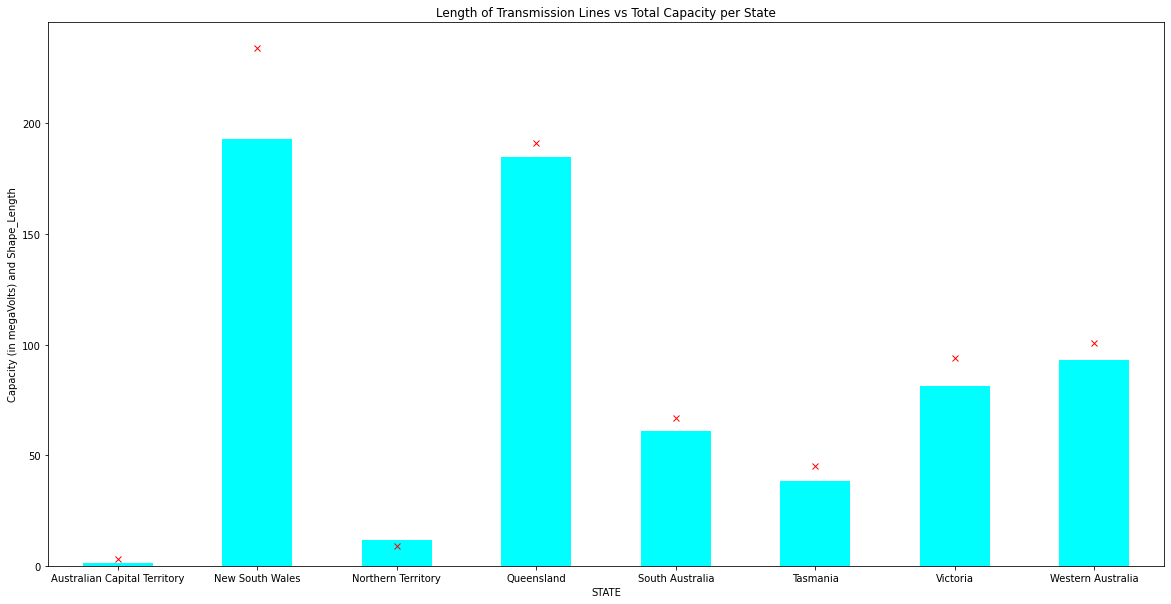

In [116]:
transmissionlines_visual["SHAPE_Leng"] = pd.to_numeric(transmissionlines_visual["SHAPE_Leng"])
tline1 = transmissionlines_visual.groupby("STATE").SHAPE_Leng.sum()
tline2 = transmissionlines_data.groupby("STATE").CAPACITYKV.sum() / 1000
ax = tline1.plot(kind='bar',color='aqua')
plt.title("Length of Transmission Lines vs Total Capacity per State")
plt.xlabel("State")
plt.ylabel("Capacity (in megaVolts) and Shape_Length")
tline2.plot(ax=ax, color='red',style='x')
plt.show()

In [117]:
import random
from shapely.geometry import LineString
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
tlines.sample(2)
cols_to_drop = ["DESCRIPTON", "descriptio", "tessellate","visibility","COMMENT", "FEATURETYP","NAME2","OBJECTID","SPATIALCON","REVISED","CAPACITYKV","STATE","OPERATIONA","FID","CLASS"]
tlines.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
tlines.sample(2)
randomnum = random.randint(0,2374)

print(tlines.sort_values("SHAPE_Leng", ascending=False).iloc[0].geometry)
print(tlines.sort_values("SHAPE_Leng", ascending=False).iloc[0])
print(randomnum)
list(tlines.sort_values("SHAPE_Leng", ascending=False).iloc[0])

LINESTRING (146.8921315 -41.1143705, 146.891518032 -41.107576411, 146.895132935 -41.10033572, 146.896970493 -41.0872559439999, 146.893912977 -41.0717302469999, 146.892582324 -41.0329521589999, 147.068359235 -38.406123593, 147.069127683 -38.402742325, 147.069921524 -38.399221398, 147.070711941 -38.395754519, 147.071455402 -38.3924363319999, 147.068630248 -38.3893842259999, 147.065562491 -38.3860738659999, 147.062659077 -38.3829435009999, 147.059786967 -38.379860091, 147.056789643 -38.376624076, 147.053951445 -38.373525015, 147.054848817 -38.369580755, 147.055767057 -38.365459108, 147.056706166 -38.3613791989999, 147.057590494 -38.3572405959999, 147.058506126 -38.3531319919999, 147.05939828 -38.349203384, 147.060376519 -38.3448130469999, 147.061209979 -38.340763382, 147.056407314 -38.339997421, 147.05124368 -38.339121408, 147.04628254 -38.338289416, 147.04136102 -38.3374662269999, 147.036901717 -38.33672888, 147.032300081 -38.3359247669999, 147.027768877 -38.335091308, 147.023378541 -38.

['Basslink-Loy Yang to Basslink-George Town',
 '3.32493064995945',

In [118]:
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
tlines.sample(2)
cols_to_drop = ["DESCRIPTON", "descriptio", "tessellate","visibility","COMMENT", "FEATURETYP","NAME2","OBJECTID","SPATIALCON","REVISED","CAPACITYKV","STATE","OPERATIONA","FID","CLASS"]
tlines.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
tlines.sample(2)
tlines.iloc[0]

Name                         Callide B Power Station to Calvale
SHAPE_Leng                                   0.0101670994252775
geometry      LINESTRING (150.619749 -24.3448799999999, 150....
Name: 0, dtype: object